In [1]:
# Detect and drop duplicate rows.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers, Sequential, optimizers

# Load the dataset
df = pd.read_csv('stroke_data.csv')

# Identify and print duplicate rows
duplicates = df[df.duplicated(keep=False)]
if not duplicates.empty:
    print("Duplicate rows found:")
    print(duplicates)
else:
    print("No duplicate rows found.")

# Drop duplicate rows
df.drop_duplicates(inplace=True)
print(f"\nNumber of rows after removing duplicates: {len(df)}")

# Detect and print rows with missing values
missing_values = df.isnull().sum().sum()
if missing_values > 0:
    print(f"\nRows with missing values found: {missing_values}")
else:
    print("\nNo missing values found.")

# Drop rows with missing values
df.dropna(inplace=True)
print(f"Number of rows after removing rows with missing values: {len(df)}")

# Print the cleaned DataFrame
print("\nData after cleaning:")
print(df)

# Save the cleaned DataFrame to a new CSV file
cleaned_file_path = 'cleaned_stroke_data.csv'
df.to_csv(cleaned_file_path, index=False)

No duplicate rows found.

Number of rows after removing duplicates: 5110

Rows with missing values found: 201
Number of rows after removing rows with missing values: 4909

Data after cleaning:
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5104  14180  Female  13.0             0              0           No   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0 

Correlation with 'stroke':

stroke               1.000000
age                  0.232331
hypertension         0.142515
avg_glucose_level    0.138936
heart_disease        0.137938
ever_married         0.105089
smoking_status       0.051558
bmi                  0.042374
gender               0.006757
Residence_type       0.006031
id                   0.004839
work_type           -0.033756
Name: stroke, dtype: float64


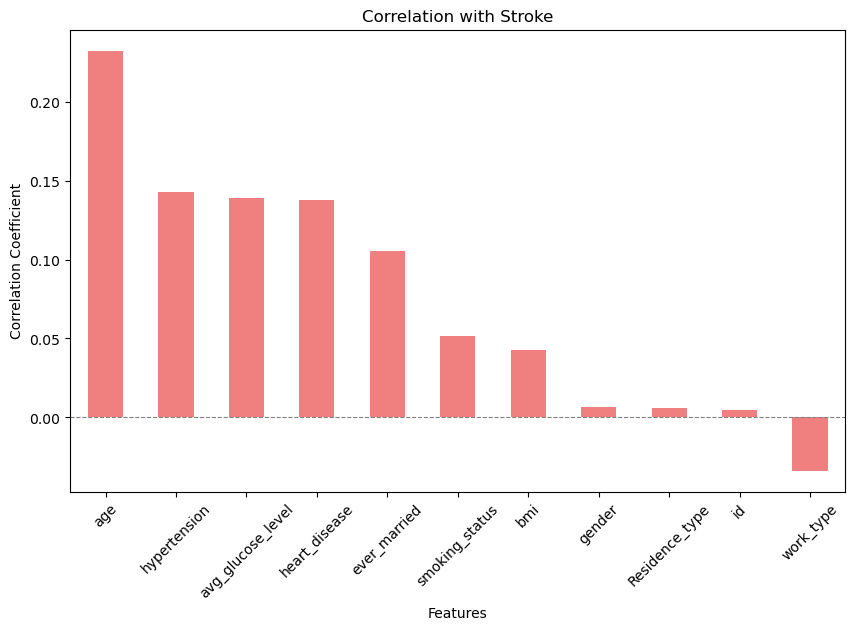

In [3]:
# Find the correlation between the independent variables and the target variable.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('cleaned_stroke_data.csv')

# List of categorical columns to encode (update with your actual categorical columns)
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Encode categorical variables using LabelEncoder
label_enc = LabelEncoder()

# Apply LabelEncoder to each categorical column
for column in categorical_columns:
    df[column] = label_enc.fit_transform(df[column])

# Convert target 'stroke' into numerical format (if not already)
df['stroke'] = label_enc.fit_transform(df['stroke'])

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Correlation with the target variable 'stroke'
correlation_with_target = correlation_matrix['stroke'].sort_values(ascending=False)

# Print correlation values with 'stroke'
print("Correlation with 'stroke':\n")
print(correlation_with_target)

# Visualize the correlation with 'stroke' using a bar plot
plt.figure(figsize=(10, 6))
correlation_with_target.drop('stroke').plot(kind='bar', color='lightcoral')
plt.title('Correlation with Stroke')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.axhline(0, color='gray', linewidth=0.8, linestyle='--')  # Add a horizontal line at 0
plt.show()

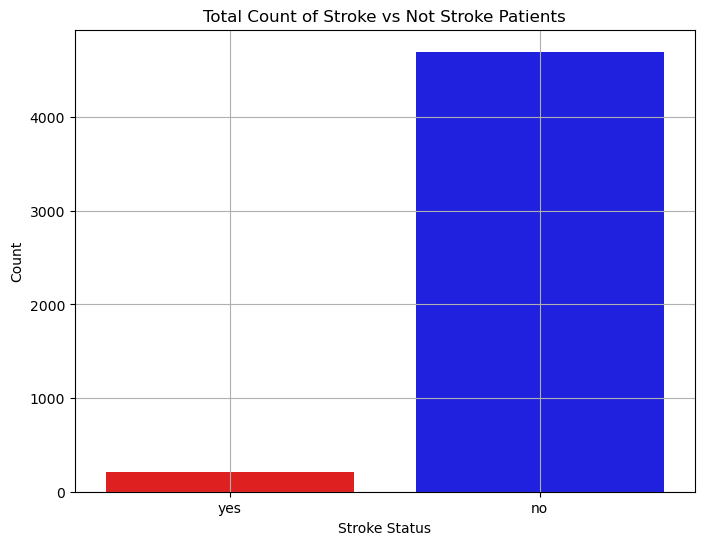

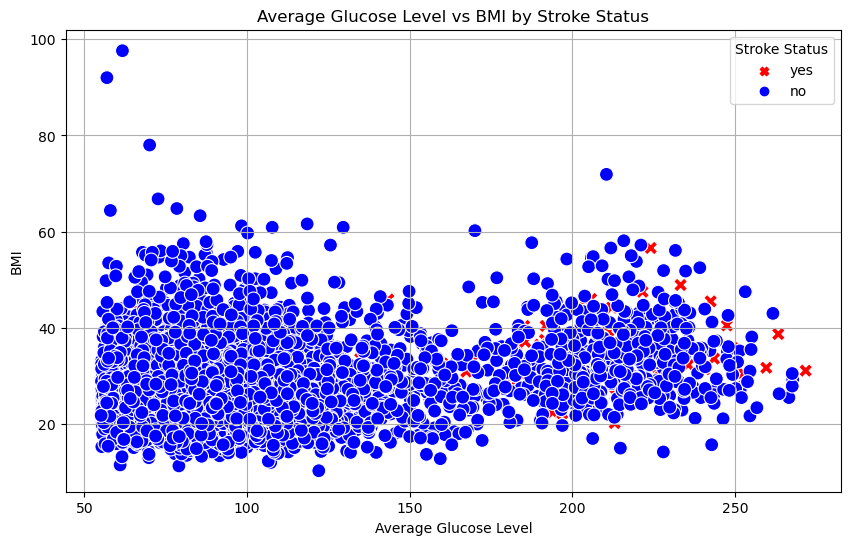

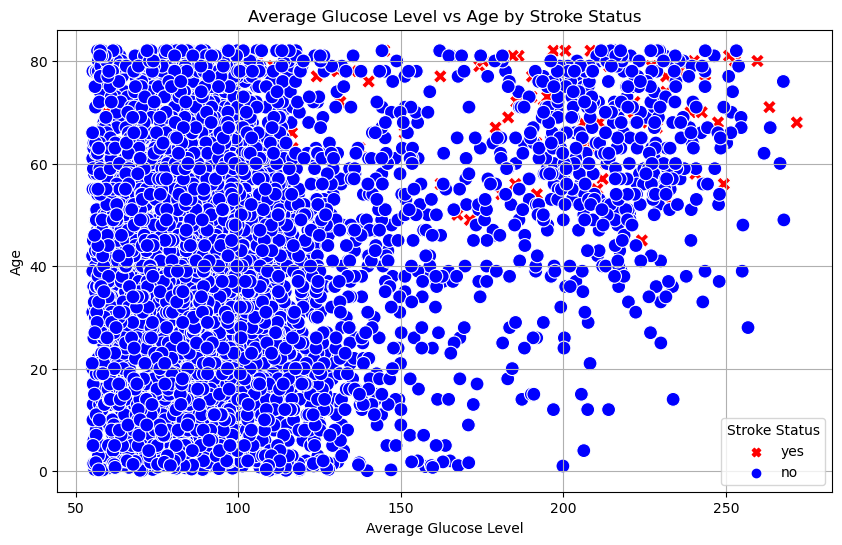

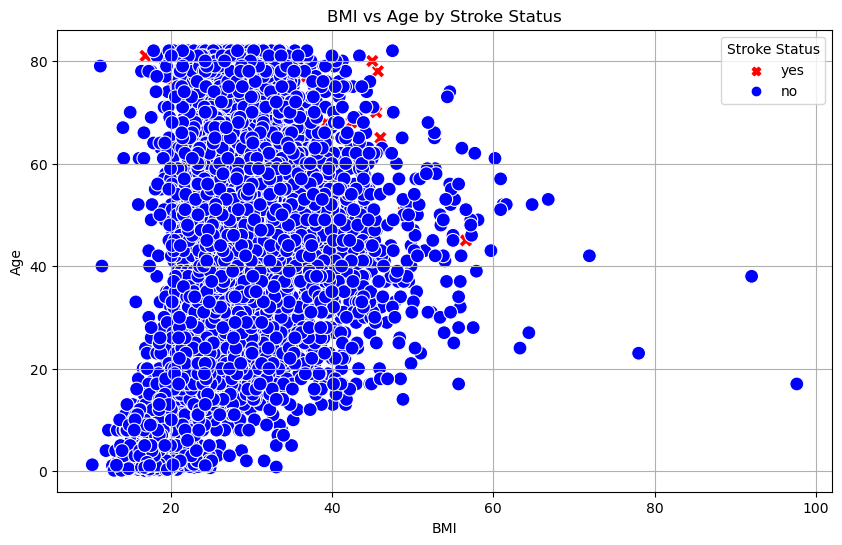

In [5]:
# Visualise the distribution of nodes based on the target variable.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cleaned_stroke_data.csv')

# Convert 'stroke' column to binary if not already (1: stroke, 0: no stroke)
df['stroke'] = df['stroke'].apply(lambda x: 1 if x == 1 else 0)

# Convert 'stroke' back to categorical for plotting purposes
df['stroke'] = df['stroke'].apply(lambda x: 'yes' if x == 1 else 'no')

# Frequency bar chart for total number of strokes vs. not strokes
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='stroke', palette={"no": "blue", "yes": "red"})
plt.title('Total Count of Stroke vs Not Stroke Patients')
plt.xlabel('Stroke Status')
plt.ylabel('Count')
plt.grid(True)
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.show()

# Scatter plot for 'avg_glucose_level' vs 'bmi'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke', 
                style='stroke', markers={"yes": "X", "no": "o"}, 
                palette={'yes': 'red', 'no': 'blue'}, s=100)
plt.title('Average Glucose Level vs BMI by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('BMI')
plt.grid(True)
plt.legend(title='Stroke Status')
plt.show()

# Scatter plot for 'avg_glucose_level' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='avg_glucose_level', y='age', hue='stroke', 
                style='stroke', markers={"yes": "X", "no": "o"}, 
                palette={'yes': 'red', 'no': 'blue'}, s=100)
plt.title('Average Glucose Level vs Age by Stroke Status')
plt.xlabel('Average Glucose Level')
plt.ylabel('Age')
plt.grid(True)
plt.legend(title='Stroke Status')
plt.show()

# Scatter plot for 'bmi' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='age', hue='stroke', 
                style='stroke', markers={"yes": "X", "no": "o"}, 
                palette={'yes': 'red', 'no': 'blue'}, s=100)
plt.title('BMI vs Age by Stroke Status')
plt.xlabel('BMI')
plt.ylabel('Age')
plt.grid(True)
plt.legend(title='Stroke Status')
plt.show()

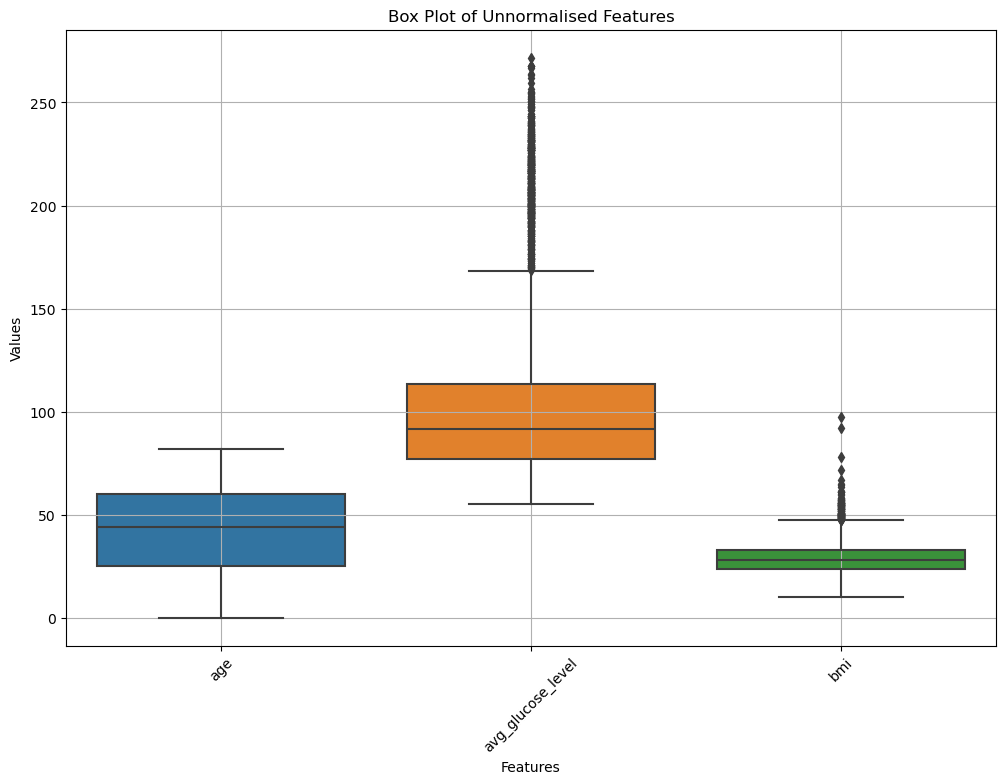

In [7]:
# Produce a boxplot of numerical variables on the same scale before normalisation.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('cleaned_stroke_data.csv')

# Select the numeric features to plot (unnormalised)
numerical_features = ['age', 'avg_glucose_level', 'bmi']

# Melt the DataFrame to long format for boxplot
df_melted = df[numerical_features].melt(var_name='Feature', value_name='Value')

# Create the box plot for unnormalised data
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_melted, x='Feature', y='Value')
plt.title('Box Plot of Unnormalised Features')
plt.ylabel('Values')
plt.xlabel('Features')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Normalised Features:
        age  avg_glucose_level       bmi  hypertension  heart_disease  \
0  1.070029           2.777415  0.981245     -0.318034       4.381522   
1  1.646395           0.013840  0.459222     -0.318034       4.381522   
2  0.271984           1.483980  0.701135     -0.318034      -0.228185   
3  1.602059           1.549035 -0.623020      3.143674      -0.228185   
4  1.690731           1.821183  0.013593     -0.318034      -0.228185   

   gender_Male  gender_Other  ever_married_Yes  work_type_Never_worked  \
0     1.200325     -0.014273           0.72941               -0.067088   
1     1.200325     -0.014273           0.72941               -0.067088   
2    -0.832938     -0.014273           0.72941               -0.067088   
3    -0.832938     -0.014273           0.72941               -0.067088   
4     1.200325     -0.014273           0.72941               -0.067088   

   work_type_Private  work_type_Self-employed  work_type_children  \
0            0.86383      

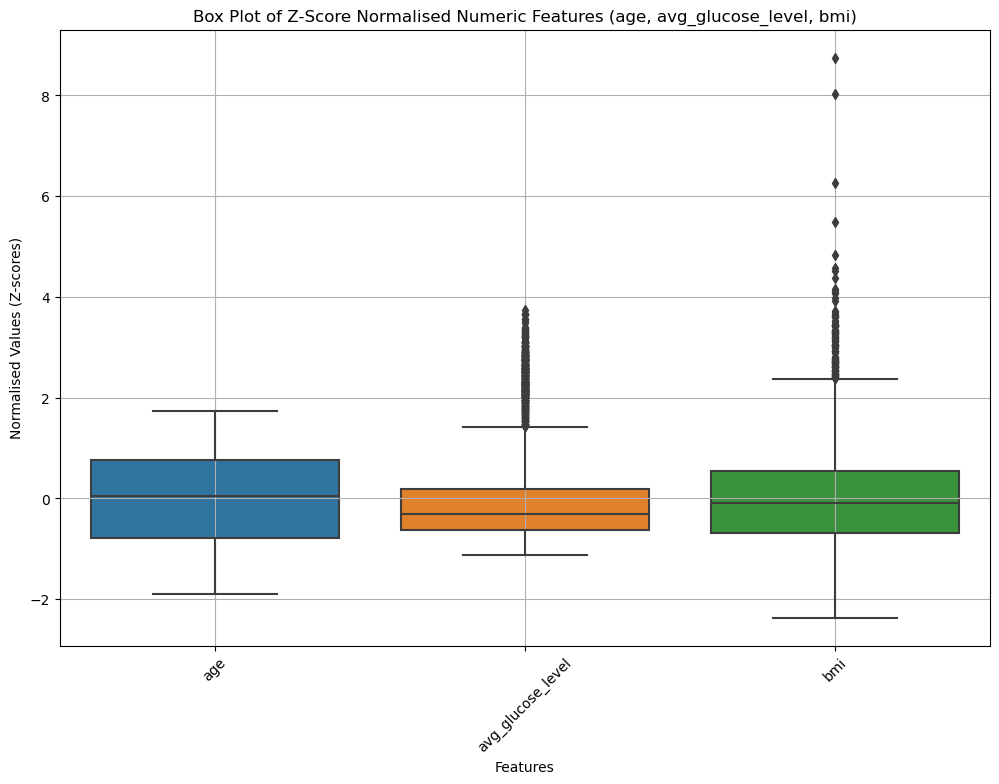

In [19]:
# Perform Z-score normalisation on the independent variables.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('cleaned_stroke_data.csv')

# Select numeric features for normalisation
numeric_features = df[['age', 'avg_glucose_level', 'bmi']]
categorical_features = df[['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']]
target = df['stroke']

# One-hot encode categorical features
categorical_encoded = pd.get_dummies(categorical_features, drop_first=True)

# Combine numeric and encoded categorical features
X = pd.concat([numeric_features, categorical_encoded], axis=1)

# Apply Z-score normalization to all features
means = X.mean()
stds = X.std()
X_normalised = (X - means) / stds

# Add the target column back to the DataFrame
X_normalised['stroke'] = target

# Save the normalised data for future use
X_normalised.to_csv('normalised_stroke_data.csv', index=False)

# Display the first few rows of the normalised data
print("Normalised Features:")
print(X_normalised.head())

# Melt the DataFrame for boxplot visualization of the numeric columns
numeric_cols_normalised = X_normalised[['age', 'avg_glucose_level', 'bmi']].melt(var_name='Feature', value_name='Value')

# Create the box plot for the normalised numeric features
plt.figure(figsize=(12, 8))
sns.boxplot(data=numeric_cols_normalised, x='Feature', y='Value')
plt.title('Box Plot of Z-Score Normalised Numeric Features (age, avg_glucose_level, bmi)')
plt.xticks(rotation=45)
plt.ylabel('Normalised Values (Z-scores)')
plt.xlabel('Features')
plt.grid(True)
plt.show()

Test Set Class Distribution:
 stroke
0    940
1     42
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 stroke
1    42
0    42
Name: count, dtype: int64
Actual vs Predicted Probabilities:
     Actual  Predicted Probability
7         1               0.826643
30        1               0.842700
0         1               0.782701
161       1               0.906227
86        1               0.804790
Accuracy: 0.81


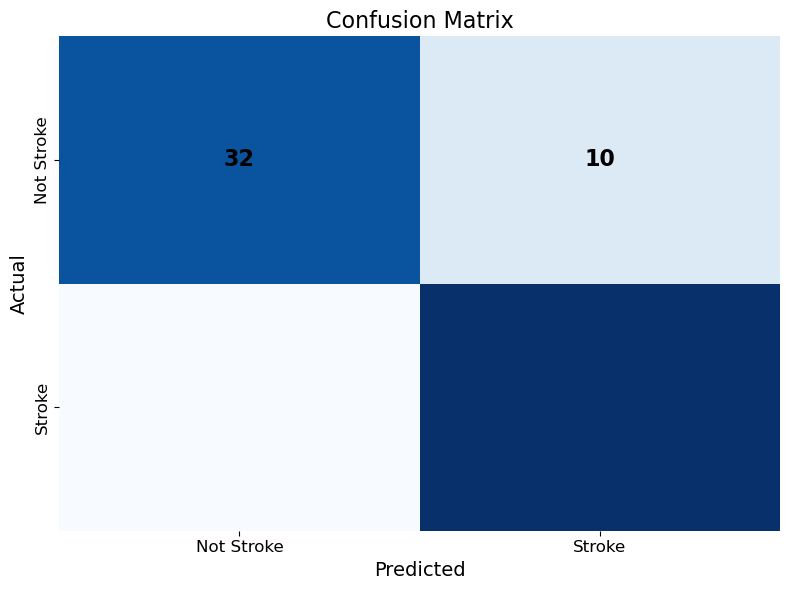

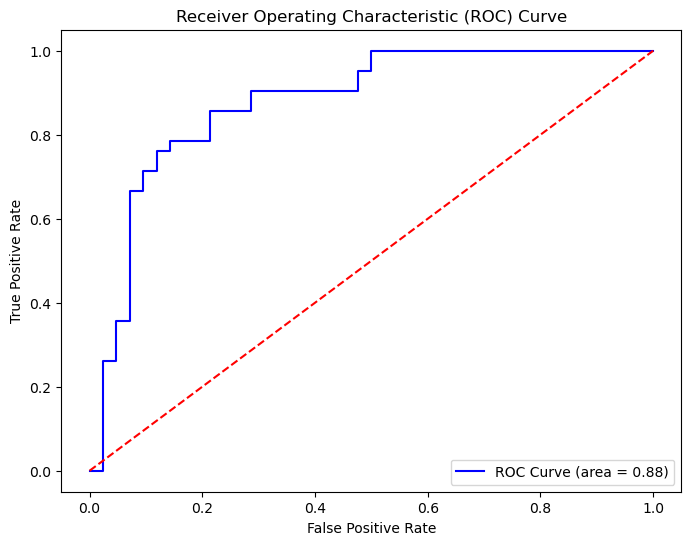

In [37]:
# Create a Logistic Regression Model.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the normalised dataset
df = pd.read_csv('normalised_stroke_data.csv')  # Adjusted file name

# Specify the target variable
target_column_name = 'stroke'

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_column_name]) 
y = df[target_column_name]

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Print class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of stroke and non-stroke cases
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([
    y_test[y_test == 1].sample(min_class_count, random_state=10) if (y_test[y_test == 1].size > 0) else pd.Series(dtype=int),
    y_test[y_test == 0].sample(min_class_count, random_state=10) if (y_test[y_test == 0].size > 0) else pd.Series(dtype=int)
])

X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)  # Increased iterations for convergence

# Fit the model
log_reg.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the balanced test set
log_reg_probs = log_reg.predict_proba(X_test_balanced)[:, 1]  # Probabilities for the positive class

# Create a DataFrame for actual and predicted probabilities
results = pd.DataFrame({'Actual': y_test_balanced, 'Predicted Probability': log_reg_probs})

# Display the first few rows
print("Actual vs Predicted Probabilities:")
print(results.head())

# Adjust threshold for predicting "Stroke"
new_threshold = 0.5
log_reg_preds = (log_reg_probs >= new_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_balanced, log_reg_preds)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_balanced, log_reg_preds)

# Improved visualisation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Stroke', 'Stroke'],
            yticklabels=['Not Stroke', 'Stroke'],
            annot_kws={"size": 16, "weight": "bold", "color": "black"})  # Larger, bold annotations
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, log_reg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test Set Class Distribution:
 stroke
0    940
1     42
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 stroke
1    42
0    42
Name: count, dtype: int64
Actual vs Predicted Probabilities:
     Actual  Predicted Probability
7         1               0.136133
30        1               0.759269
0         1               0.685001
161       1               0.554268
86        1               0.502627
Accuracy: 0.69


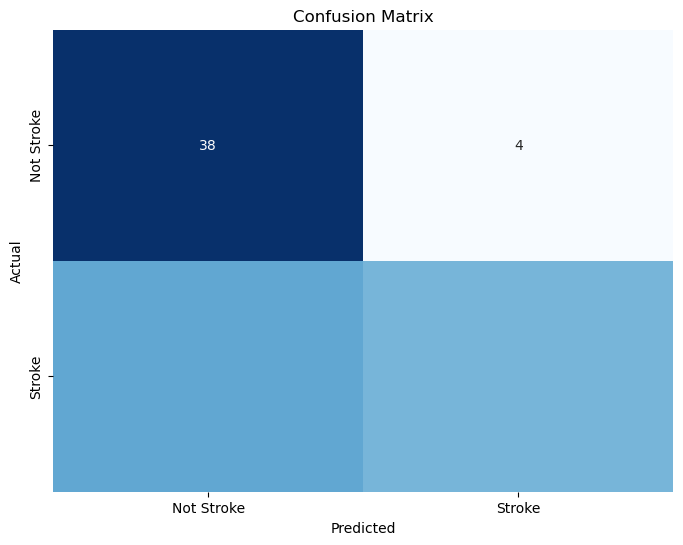

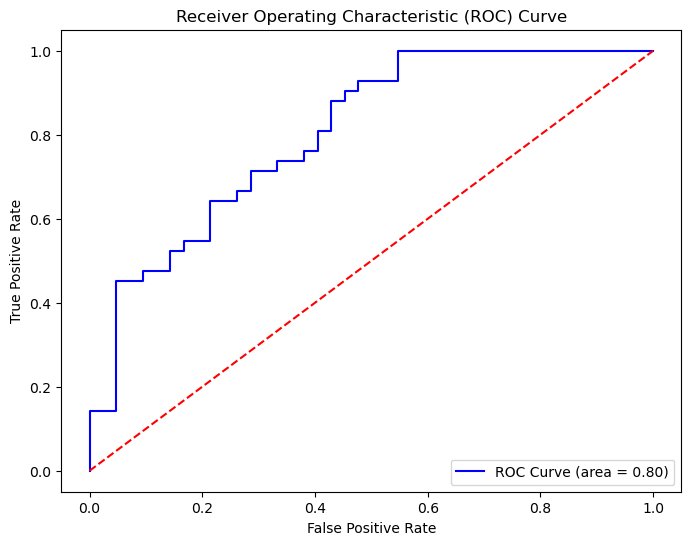

In [47]:
# Create a Gradient Boosting Model.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the normalised dataset
df = pd.read_csv('normalised_stroke_data.csv')

# Specify the target variable
target_column_name = 'stroke'

# Split the data into features and target variable
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Print class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of stroke and non-stroke cases
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([
    y_test[y_test == 1].sample(min_class_count, random_state=10) if (y_test[y_test == 1].size > 0) else pd.Series(dtype=int),
    y_test[y_test == 0].sample(min_class_count, random_state=10) if (y_test[y_test == 0].size > 0) else pd.Series(dtype=int)
])

X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=5)

# Fit the model on resampled training data
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the balanced test set
gb_probs = gb_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for the positive class

# Create a DataFrame for actual and predicted probabilities
results = pd.DataFrame({'Actual': y_test_balanced, 'Predicted Probability': gb_probs})

# Display the first few rows
print("Actual vs Predicted Probabilities:")
print(results.head())

# Calculate predicted classes based on a threshold (e.g., 0.5)
gb_preds = (gb_probs >= 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_balanced, gb_preds)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_balanced, gb_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Stroke', 'Stroke'],
            yticklabels=['Not Stroke', 'Stroke'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, gb_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test Set Class Distribution:
 stroke
0    940
1     42
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 stroke
1    42
0    42
Name: count, dtype: int64
Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.8993 - accuracy: 0.5095 - val_loss: 0.7831 - val_accuracy: 0.3211 - lr: 1.0000e-05
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.9025 - accuracy: 0.5081 - val_loss: 0.7977 - val_accuracy: 0.3112 - lr: 1.0000e-05
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8878 - accuracy: 0.5131 - val_loss: 0.8013 - val_accuracy: 0.3118 - lr: 1.0000e-05
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.8947 - accuracy: 0.5096 - val_loss: 0.7998 - val_accuracy: 0.3225 - lr: 1.0000e-05
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.8658 - accuracy: 0.5223 - val_loss: 0.7904 - val_accuracy: 0.3324 - lr: 1.0000e-05
Epoch 6/100
94/94 [======================

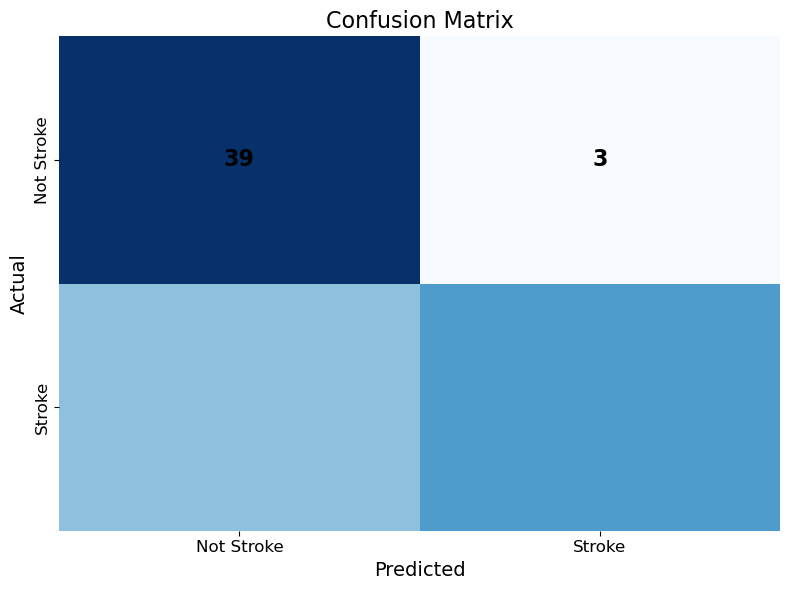

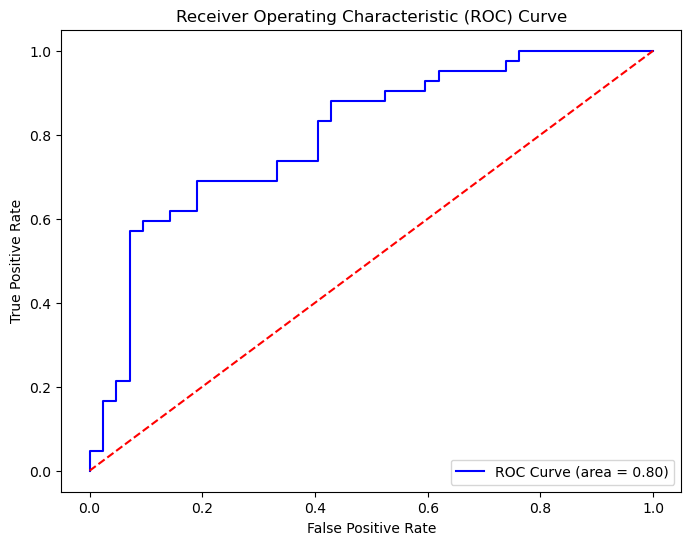

In [27]:
# Create a Logistic Regression Model using a Neural Network.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import StandardScaler

# Load the normalised dataset
df = pd.read_csv('normalised_stroke_data.csv')  # Adjusted file name

# Specify the target variable
target_column_name = 'stroke'

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_column_name]) 
y = df[target_column_name]

# Adjust the hyperparameters
epochs = 100
batch_size = 64
learning_rate = 0.00001

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

# Print class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of stroke and non-stroke cases
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([
    y_test[y_test == 1].sample(min_class_count, random_state=10) if (y_test[y_test == 1].size > 0) else pd.Series(dtype=int),
    y_test[y_test == 0].sample(min_class_count, random_state=10) if (y_test[y_test == 0].size > 0) else pd.Series(dtype=int)
])

X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Scale the features
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test_balanced = scaler.transform(X_test_balanced)

# Build the Neural Network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)))  # Input layer
model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
model.add(BatchNormalization())  # Batch normalization for stability
model.add(Dense(32, activation='relu'))  # Hidden layer
model.add(Dropout(0.5))  # Dropout layer
model.add(BatchNormalization())  # Batch normalization
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model with the specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

# Callbacks for learning rate reduction and early stopping
lr_reduction = ReduceLROnPlateau(monitor='loss', patience=5, factor=0.5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model (removed class_weight parameter)
model.fit(X_train_resampled, y_train_resampled, epochs=epochs, batch_size=batch_size, 
          verbose=1, 
          validation_split=0.2,  # Add validation split for early stopping
          callbacks=[lr_reduction, early_stopping])

# Predict probabilities on the balanced test set
log_reg_probs = model.predict(X_test_balanced).flatten()  # Probabilities for the positive class

# Create a DataFrame for actual and predicted probabilities
results = pd.DataFrame({'Actual': y_test_balanced, 'Predicted Probability': log_reg_probs})

# Display the first few rows
print("Actual vs Predicted Probabilities:")
print(results.head())

# Adjust threshold for predicting "Stroke"
new_threshold = 0.5
log_reg_preds = (log_reg_probs >= new_threshold).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_balanced, log_reg_preds)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_balanced, log_reg_preds)

# Improved visualisation of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Stroke', 'Stroke'],
            yticklabels=['Not Stroke', 'Stroke'],
            annot_kws={"size": 16, "weight": "bold", "color": "black"})  # Larger, bold annotations
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test_balanced, log_reg_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Test Set Class Distribution:
 stroke
0    940
1     42
Name: count, dtype: int64
Balanced Test Set Class Distribution:
 stroke
1    42
0    42
Name: count, dtype: int64
Resampled Training Set Shape:
 (7520, 16) (7520,)
Gradient Boosting Accuracy: 0.79


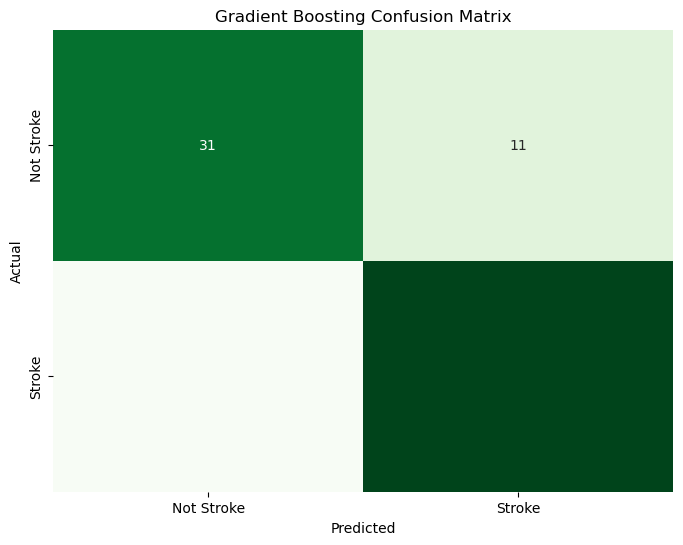

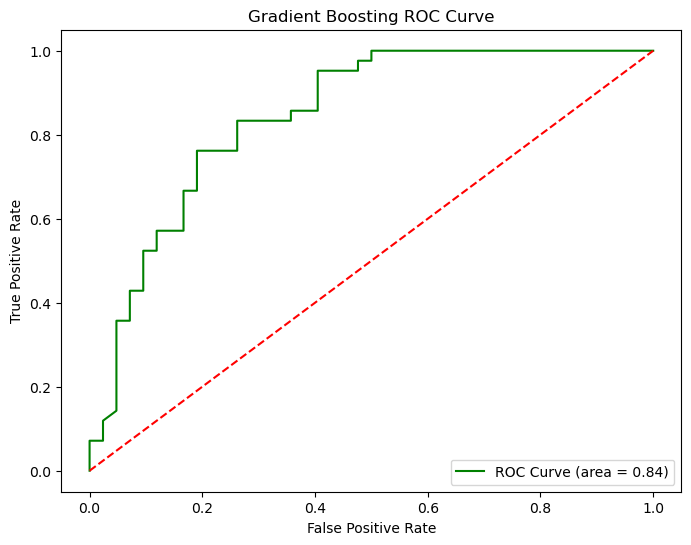

In [ ]:
# Create a Gradient Boosting Model using a Neural Network.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Load the normalized dataset
df = pd.read_csv('normalised_stroke_data.csv')

# Specify the target variable
target_column_name = 'stroke'

# Split the data into features (X) and target variable (y)
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Adjust the hyperparameters
gb_n_estimators = 100
gb_learning_rate = 0.02
gb_max_depth = 3

# Split the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5, stratify=y)

# Check the class distribution in the test set
print("Test Set Class Distribution:\n", pd.Series(y_test).value_counts())

# Resample the test set to have an equal number of stroke and non-stroke cases
min_class_count = min(y_test.value_counts())  # Get the smaller class count from the test set
y_test_balanced = pd.concat([
    y_test[y_test == 1].sample(min_class_count, random_state=10) if (y_test[y_test == 1].size > 0) else pd.Series(dtype=int),
    y_test[y_test == 0].sample(min_class_count, random_state=10) if (y_test[y_test == 0].size > 0) else pd.Series(dtype=int)
])

X_test_balanced = X_test.loc[y_test_balanced.index]

# Print the balanced test set distribution
print("Balanced Test Set Class Distribution:\n", pd.Series(y_test_balanced).value_counts())

# Apply SMOTE for oversampling the minority class in the training set
smote = SMOTE(random_state=5)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of the resampled training data
print("Resampled Training Set Shape:\n", X_train_resampled.shape, y_train_resampled.shape)

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(
    n_estimators=gb_n_estimators, 
    learning_rate=gb_learning_rate, 
    max_depth=gb_max_depth, 
    random_state=5
)
gb_model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities on the test set
y_probs_gb = gb_model.predict_proba(X_test_balanced)[:, 1]  # Probabilities for the positive class

# Calculate predicted classes based on a threshold
y_preds_gb = (y_probs_gb >= 0.5).astype(int)

# Calculate and print accuracy for Gradient Boosting
accuracy_gb = accuracy_score(y_test_balanced, y_preds_gb)
print(f'Gradient Boosting Accuracy: {accuracy_gb:.2f}')

# Confusion Matrix for Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test_balanced, y_preds_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Not Stroke', 'Stroke'],
            yticklabels=['Not Stroke', 'Stroke'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve for Gradient Boosting
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_balanced, y_probs_gb)
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, color='green', label=f'ROC Curve (area = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.show()